In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
Is=pd.read_csv("insurance.csv")
Is.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
#check null values
Is.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [4]:
#check dtype
Is.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

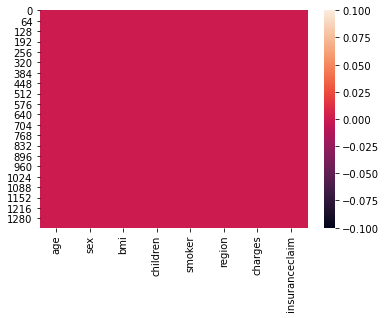

In [5]:
#check null value with heatmap graph
sb.heatmap(Is.isnull())
plt.show()

# package install for automl
    !pip install TPOT
    Tree-based Pipeline Optimization Tool, or TPOT for short, is a Python library 
    for automated machine learning. 
    TPOT uses a tree-based structure ...

In [6]:
#select feature and target
X=Is.drop("insuranceclaim",axis=1)
Y=Is["insuranceclaim"]

In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
from tpot import TPOTClassifier #TPOTClassifier is inbuilt method

In [9]:
model=TPOTClassifier(generations=5,random_state=1)
#best value of generations=5 or 10

In [10]:
#train the model with the help of TPOTClassifier class
model.fit(X_train,Y_train)

TPOTClassifier(generations=5, random_state=1)

In [11]:
#train score
model.score(X_train,Y_train)

1.0

In [12]:
#test score 
model.score(X_test,Y_test)

0.9776119402985075

In [13]:
model.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                                        max_depth=9,
                                                                        max_features=0.9000000000000001,
                                                                        min_samples_leaf=2,
                                                                        min_samples_split=7,
                                                                        random_state=1,
                                                                        subsample=0.9000000000000001))),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=9,
                                            max_features=0.7500000000000001,
                                            min_samples_leaf=4,
                                            min_samples_sp

In [14]:
model.export("insurance_pipeline.py")
#to save code in new file of python
#model.export("new filename.py")